In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Yoru\AppData\Local\Temp\ipykernel_12456\2095697874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("dummy_data.csv")

In [5]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [6]:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [7]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [9]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

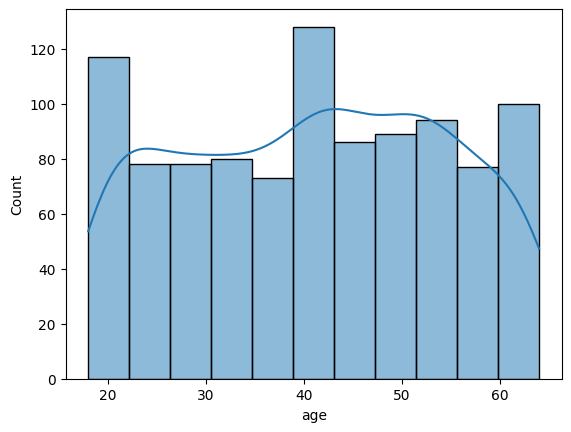

In [11]:
sns.histplot(df["age"],kde=True)

<Axes: xlabel='gender', ylabel='count'>

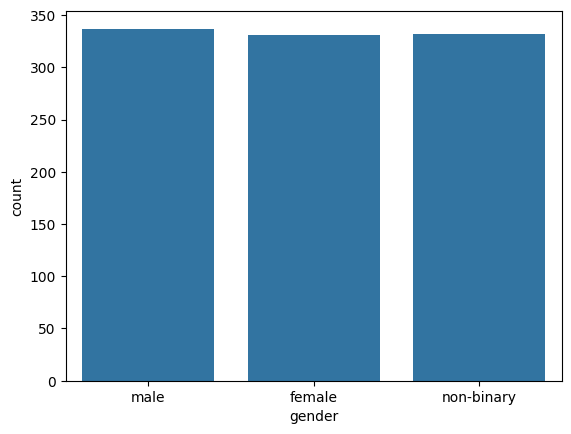

In [13]:
sns.countplot(x=df["gender"])

<Axes: xlabel='time_spent', ylabel='Count'>

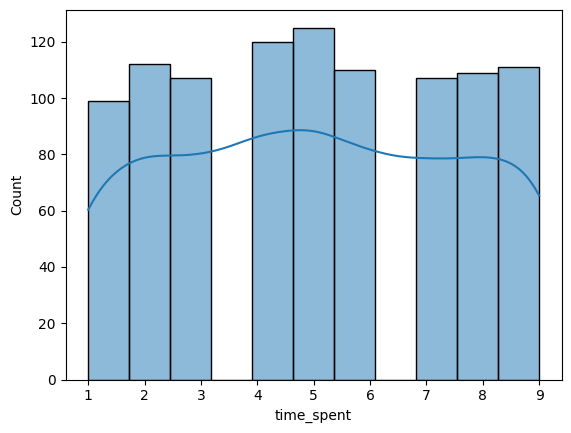

In [14]:
sns.histplot(df["time_spent"],kde=True)

<Axes: xlabel='platform', ylabel='count'>

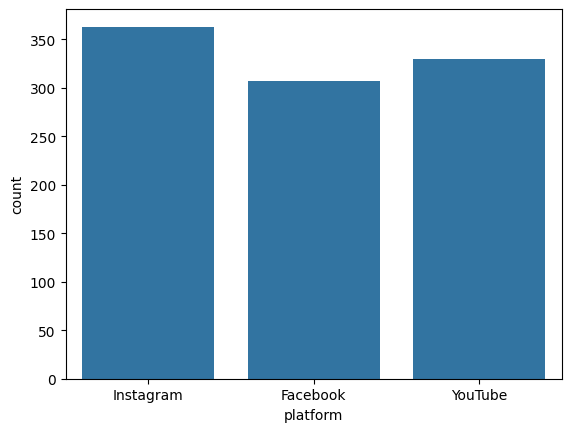

In [18]:
sns.countplot(x=df["platform"])

<Axes: xlabel='interests', ylabel='count'>

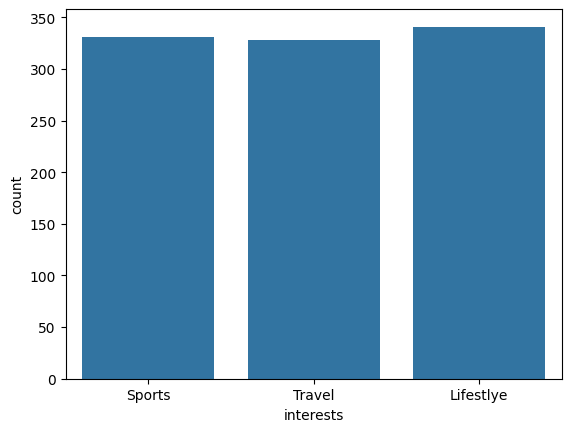

In [19]:
sns.countplot(x=df["interests"])

<Axes: xlabel='location', ylabel='count'>

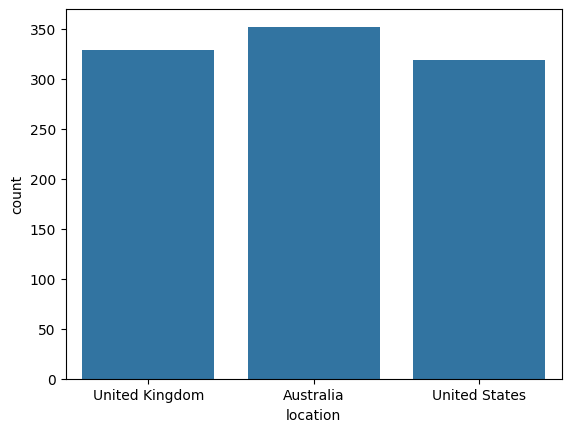

In [20]:
sns.countplot(x=df["location"])

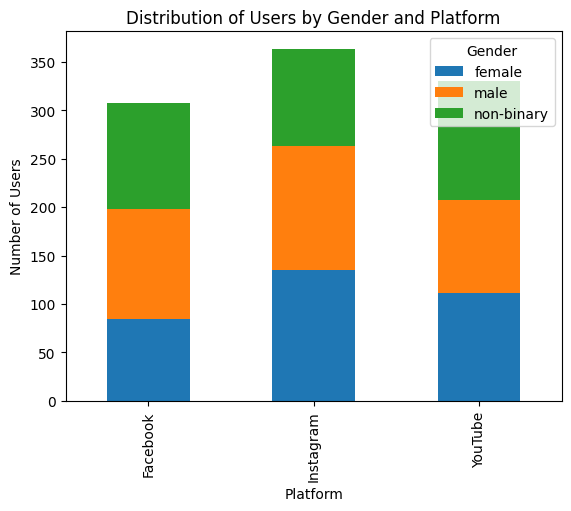

In [21]:
# Create a pivot table to restructure the data
pivot_df = df.pivot_table(index='platform', columns='gender', values='time_spent', aggfunc='count')

# Create a stacked bar chart
pivot_df.plot(kind='bar', stacked=True) 
plt.xlabel("Platform")
plt.ylabel("Number of Users")
plt.title("Distribution of Users by Gender and Platform")
plt.legend(title="Gender")
plt.show()

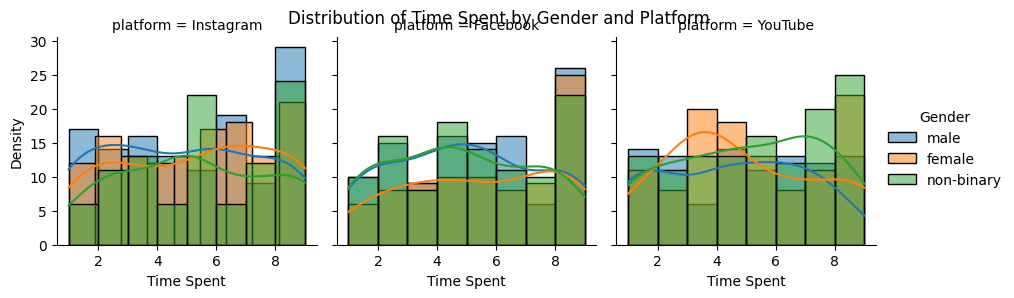

In [22]:
# Create a faceted histogram using Seaborn's FacetGrid
g = sns.FacetGrid(df, col="platform", hue="gender")
g.map(sns.histplot, "time_spent", kde=True)

# Customize layout and labels
g.fig.suptitle("Distribution of Time Spent by Gender and Platform")
g.add_legend(title="Gender")
for ax in g.axes.flat:
    ax.set_xlabel("Time Spent")
    ax.set_ylabel("Density")

plt.show()

In [23]:
## Let's resume this again :

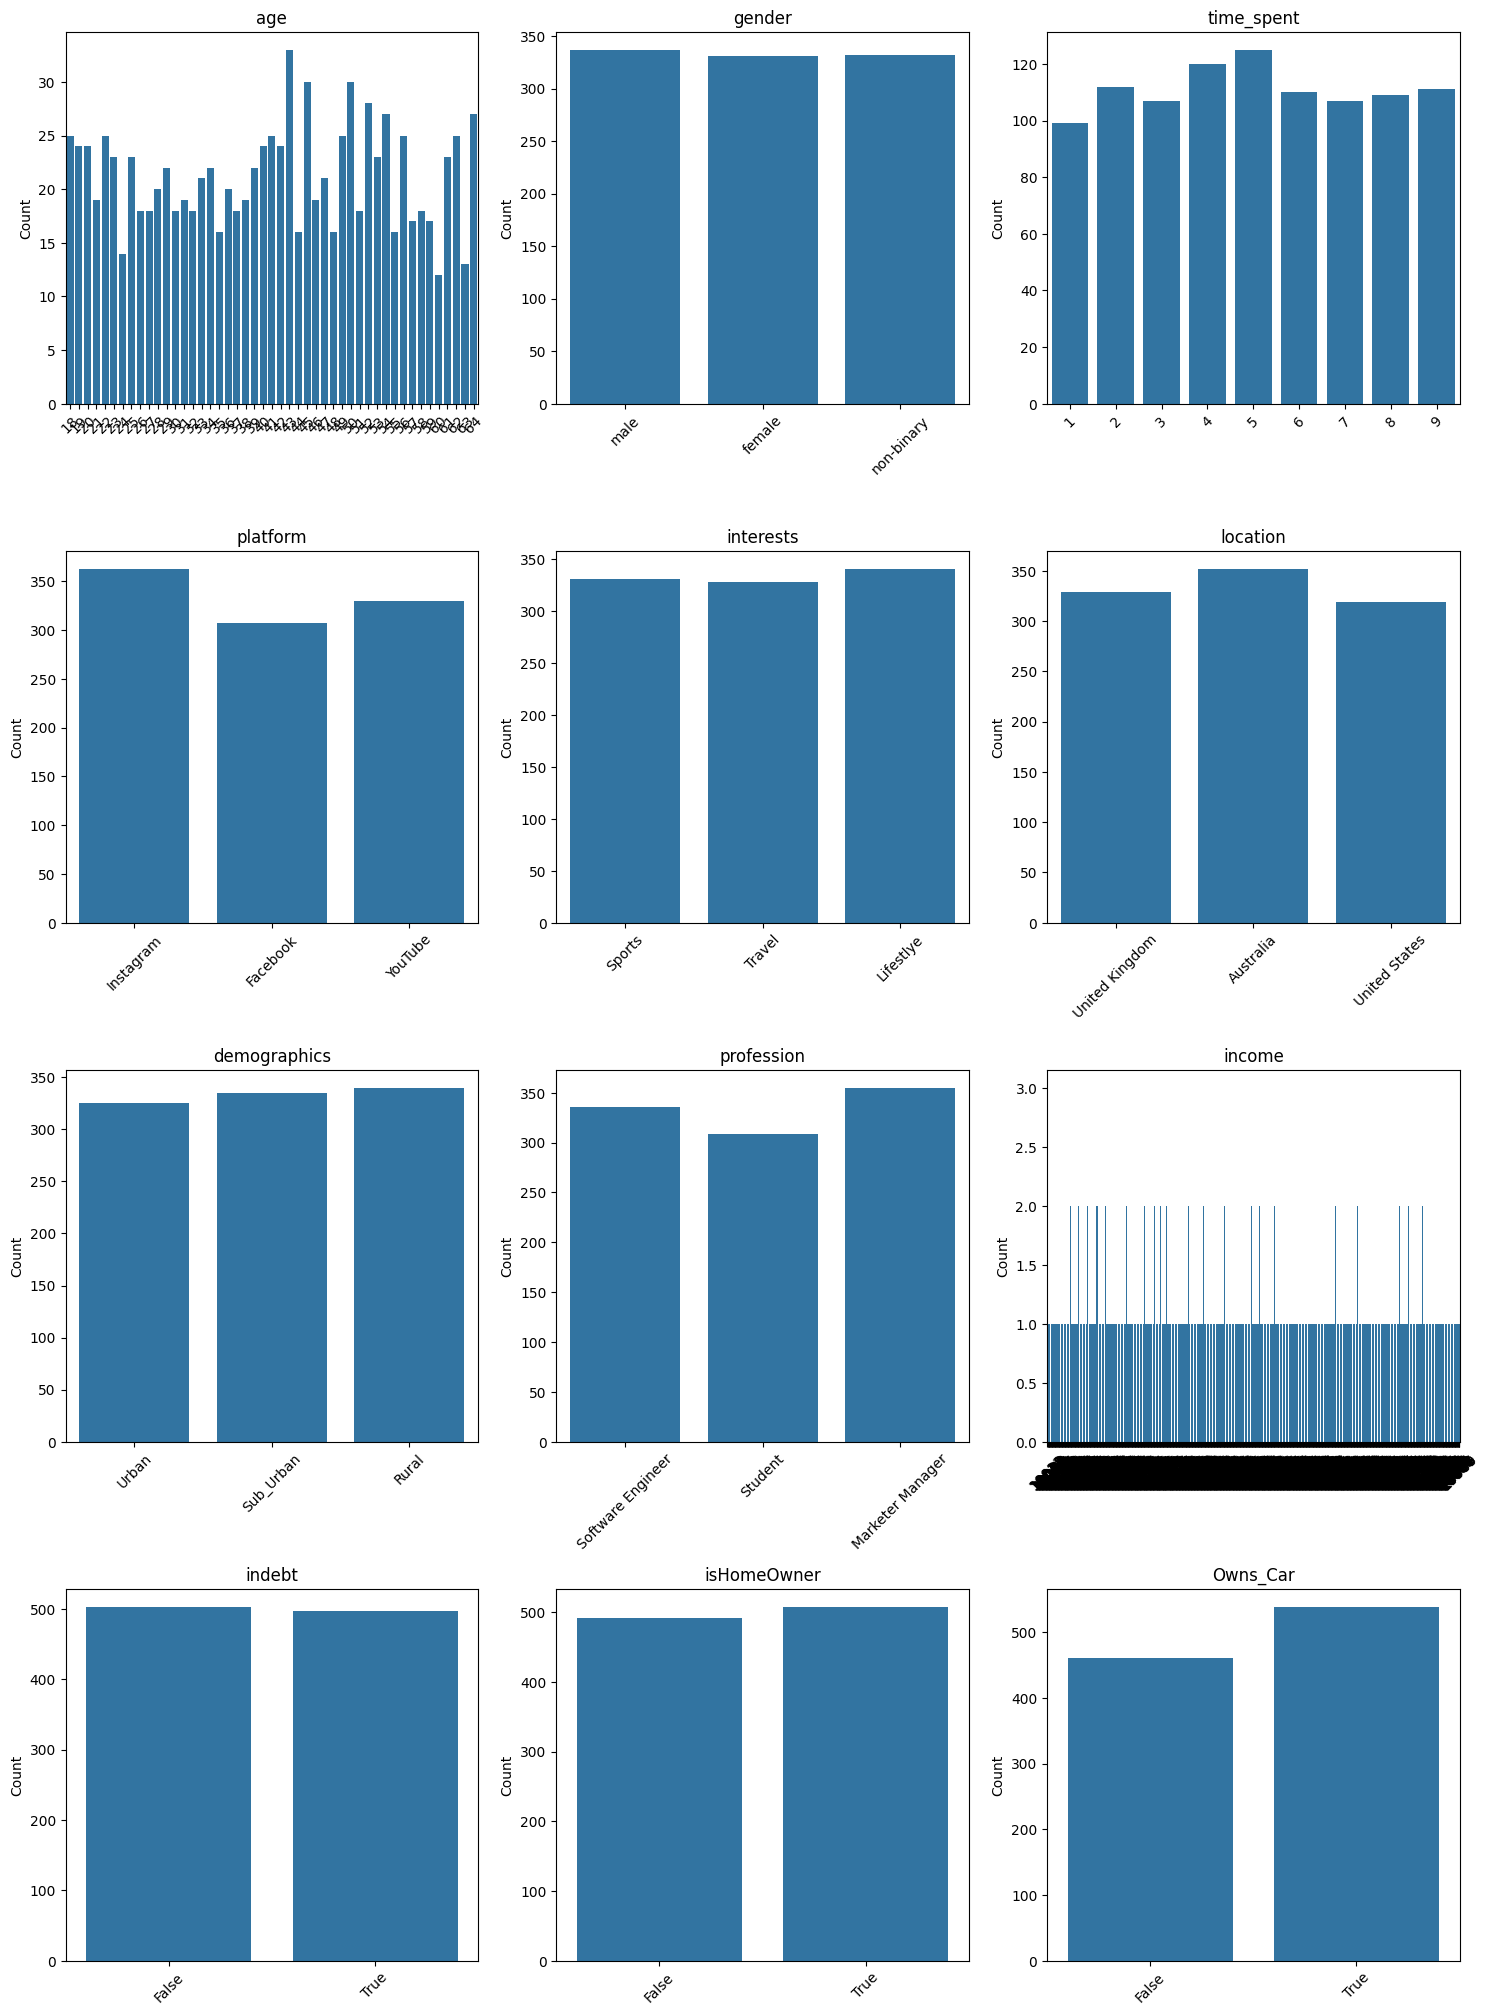

In [25]:
# Assuming df is your DataFrame
columns = ['age', 'gender', 'time_spent', 'platform', 'interests', 'location', 'demographics', 'profession', 'income', 'indebt', 'isHomeOwner', 'Owns_Car']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(columns)//3 + 1, ncols=3, figsize=(15, 25))

# Flatten the axes array
axes = axes.flatten()

# Iterate through each column and plot countplot
for i, column in enumerate(columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:
#Bivariant Analysis

In [27]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


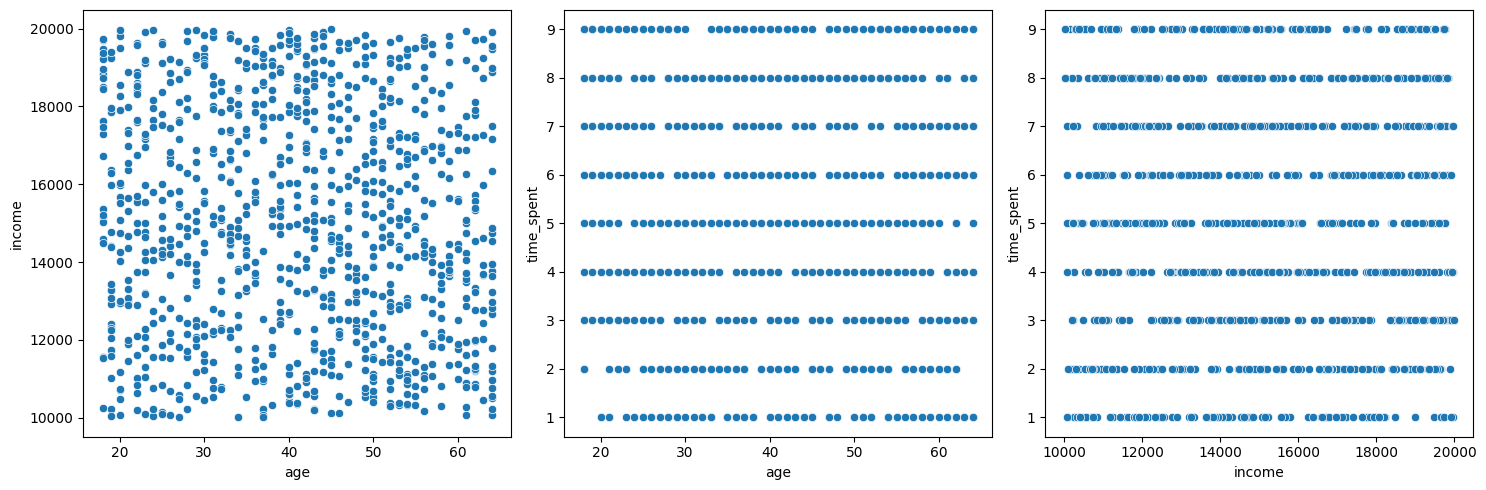

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on each subplot
sns.scatterplot(data=df,x="age", y="income", ax=axs[0])
axs[0].set_xlabel("age")
axs[0].set_ylabel('income')

sns.scatterplot(data=df,x="age", y="time_spent", ax=axs[1])
# axs[1].set_title('Plot 2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('time_spent')

sns.scatterplot(data=df,x="income", y="time_spent", ax=axs[2])
# axs[2].set_title('Plot 3')
axs[2].set_xlabel('income')
axs[2].set_ylabel('time_spent')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
df.head(0)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car


In [31]:
categorical_columns=["gender","platform","interests","location","demographics","profession"]

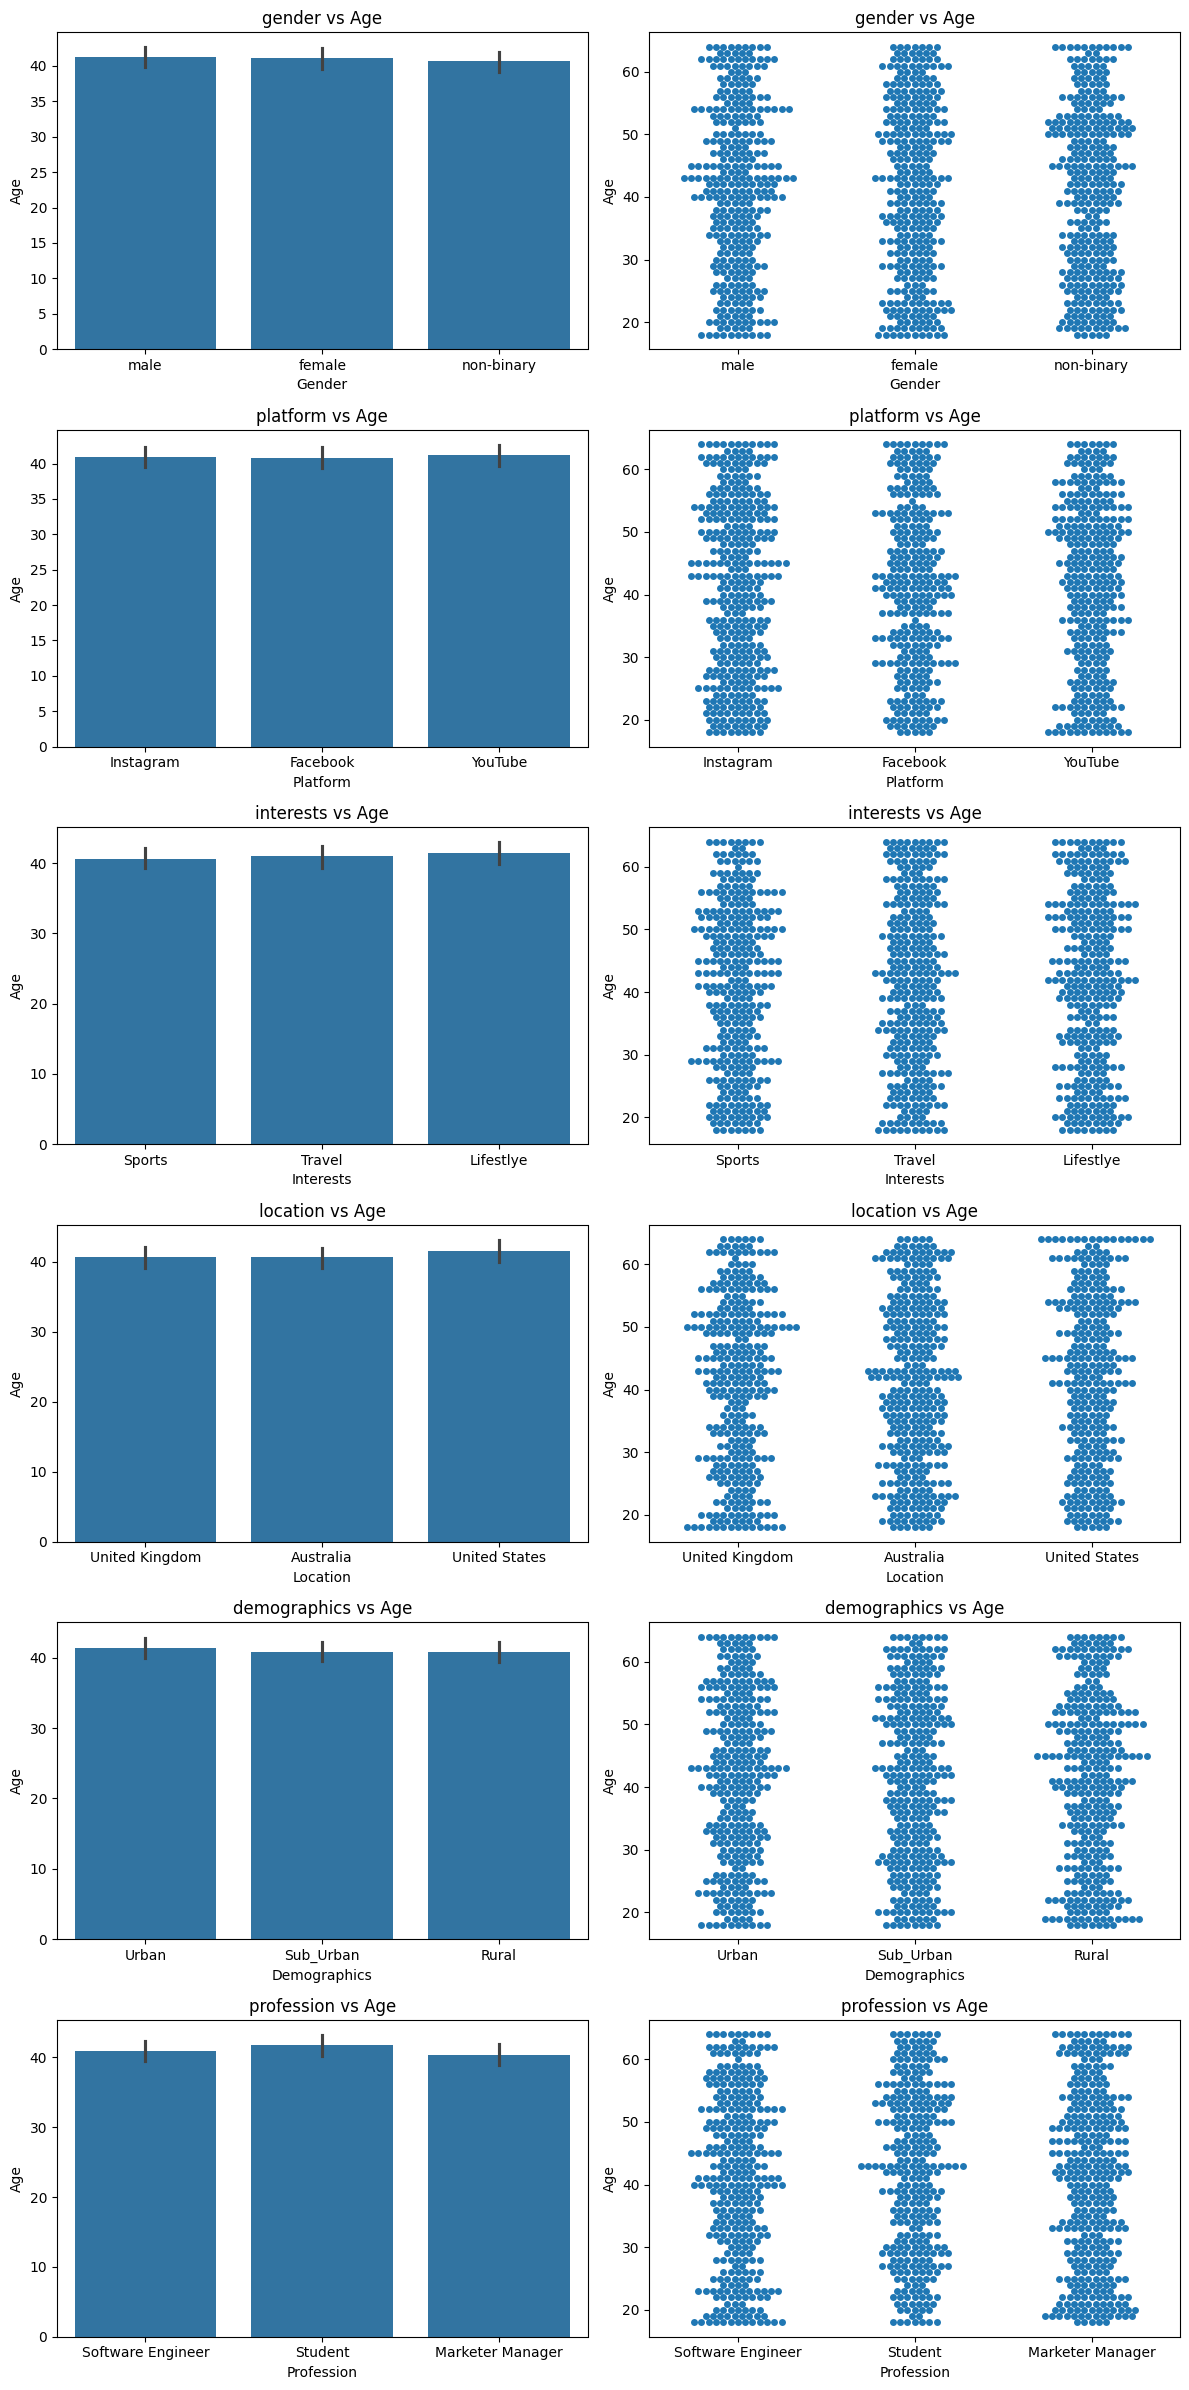

In [32]:
fig, axs = plt.subplots(6, 2, figsize=(12, 24))

# Plot categorical columns
for i, col in enumerate(categorical_columns):
    sns.barplot(data=df, x=col, y="age", ax=axs[i, 0])
    axs[i, 0].set_title(f'{col} vs Age')
    axs[i, 0].set_xlabel(col.capitalize())
    axs[i, 0].set_ylabel('Age')

    sns.swarmplot(data=df, x=col, y="age", ax=axs[i, 1])
    axs[i, 1].set_title(f'{col} vs Age')
    axs[i, 1].set_xlabel(col.capitalize())
    axs[i, 1].set_ylabel('Age')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

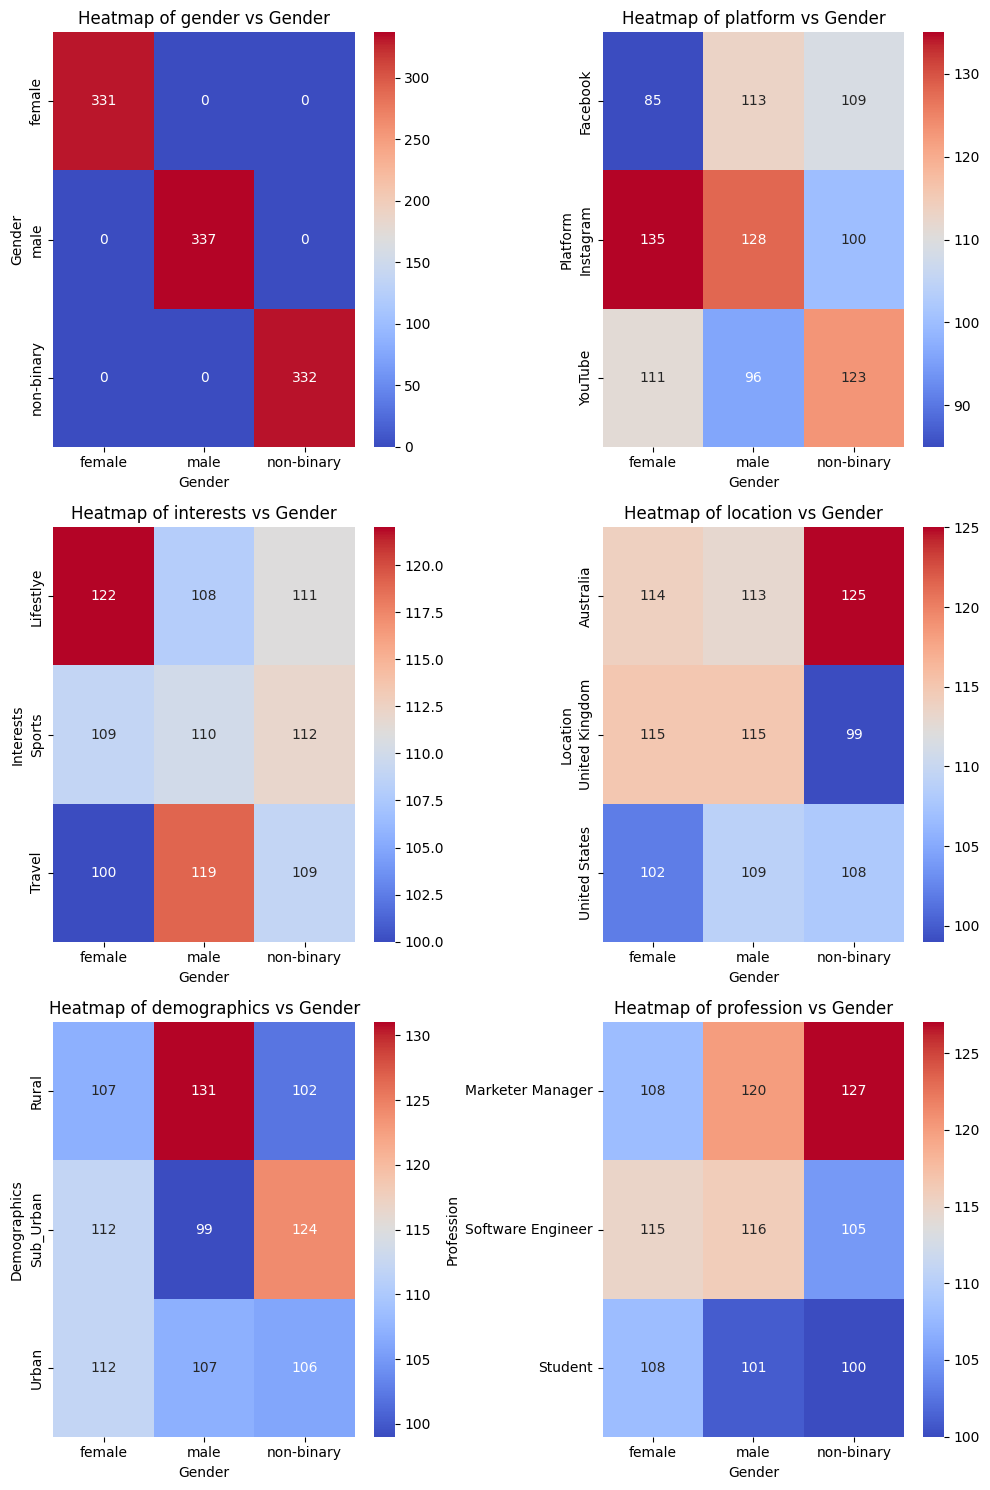

In [33]:
ig, axs = plt.subplots(3, 2, figsize=(10,15))

# Plot heatmap for each categorical column
for i, col in enumerate(categorical_columns):
    # Calculate the cross-tabulation
    cross_tab = pd.crosstab(df[col], df["gender"])
    
    # Plot heatmap
    sns.heatmap(cross_tab, ax=axs[i // 2, i % 2], cmap='coolwarm', annot=True, fmt='d')
    
    # Set title and labels
    axs[i // 2, i % 2].set_title(f'Heatmap of {col} vs Gender')
    axs[i // 2, i % 2].set_xlabel('Gender')
    axs[i // 2, i % 2].set_ylabel(col.capitalize())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

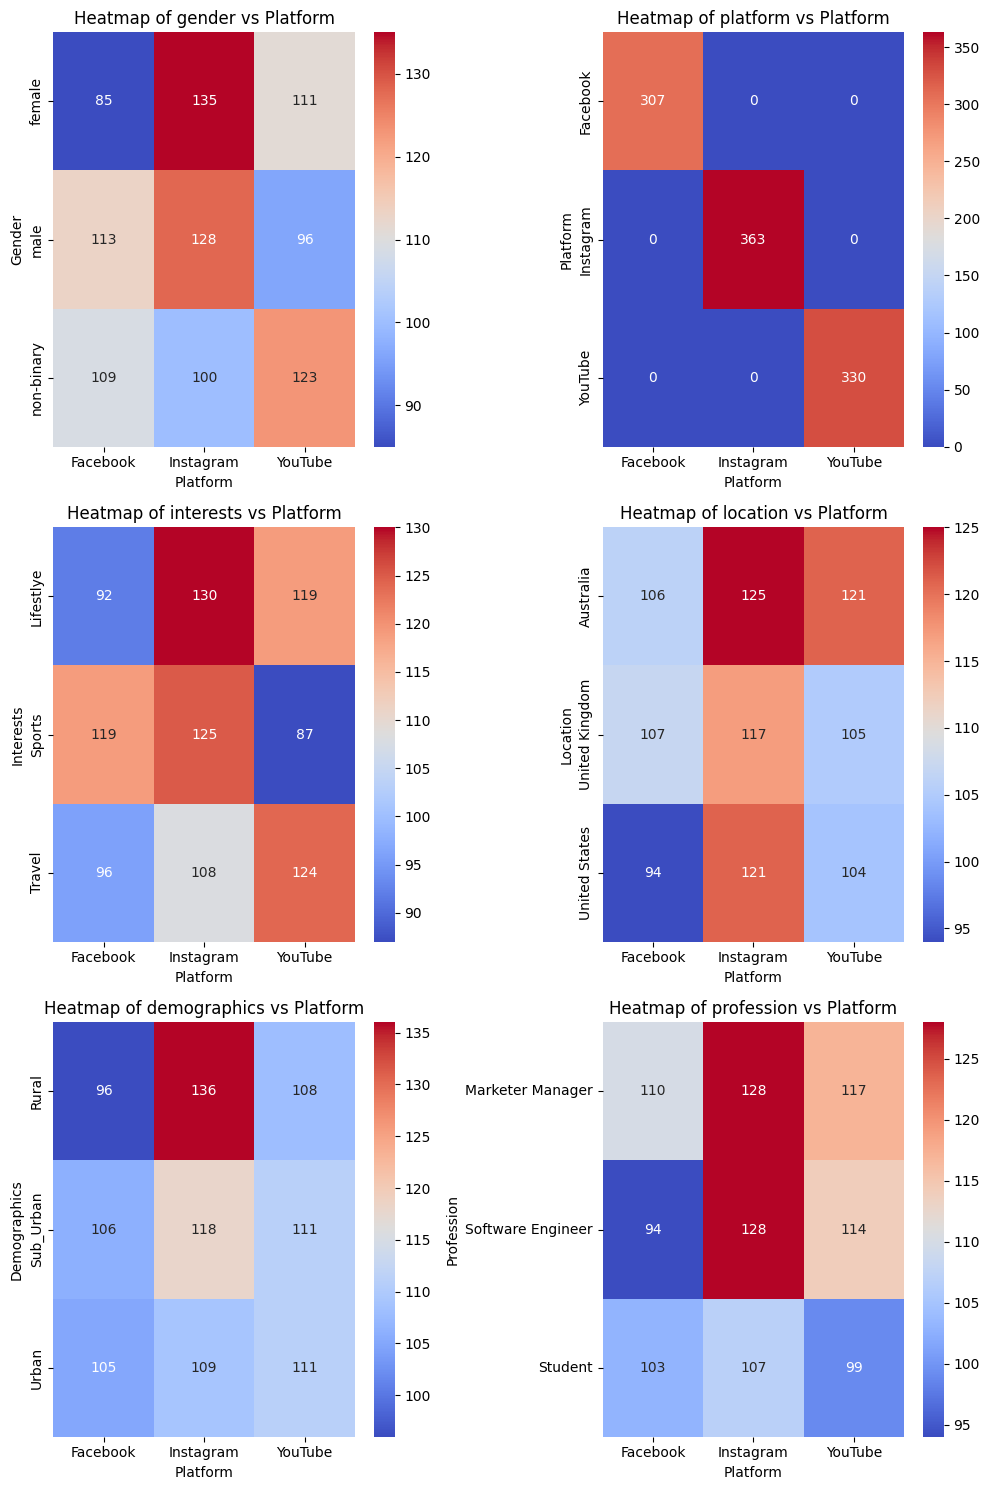

In [34]:
ig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Plot heatmap for each categorical column
for i, col in enumerate(categorical_columns):
    # Calculate the cross-tabulation
    cross_tab = pd.crosstab(df[col], df["platform"])
    
    # Plot heatmap
    sns.heatmap(cross_tab, ax=axs[i // 2, i % 2], cmap='coolwarm', annot=True, fmt='d')
    
    # Set title and labels
    axs[i // 2, i % 2].set_title(f'Heatmap of {col} vs Platform')
    axs[i // 2, i % 2].set_xlabel('Platform')
    axs[i // 2, i % 2].set_ylabel(col.capitalize())

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
### Note: There are 6 categorical column so we can create 36 heatmaps.I only showed few ones 

In [37]:
# Multivariant Analysis

In [38]:
df.head(0)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car


<Axes: xlabel='time_spent', ylabel='age'>

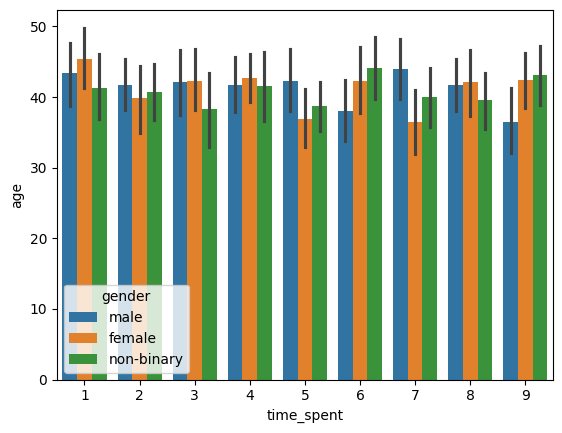

In [39]:
sns.barplot(x=df["time_spent"],y=df["age"],hue=df["gender"])

<Axes: xlabel='time_spent', ylabel='age'>

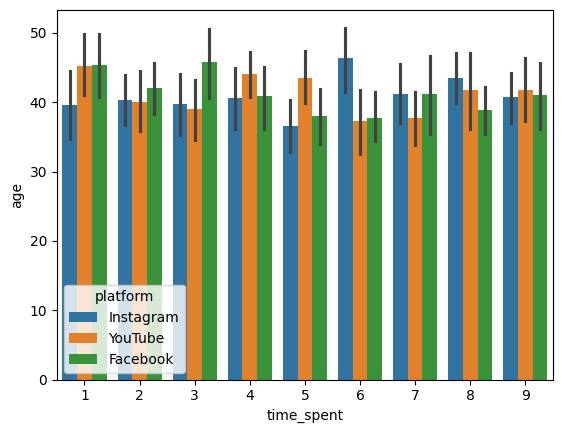

In [41]:
sns.barplot(hue=df["platform"],y=df["age"],x=df["time_spent"])

<Axes: xlabel='interests', ylabel='age'>

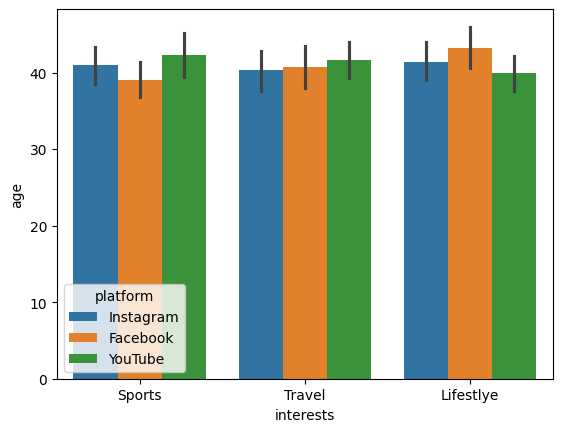

In [42]:
sns.barplot(hue=df["platform"],y=df["age"],x=df["interests"])

<Axes: xlabel='time_spent', ylabel='age'>

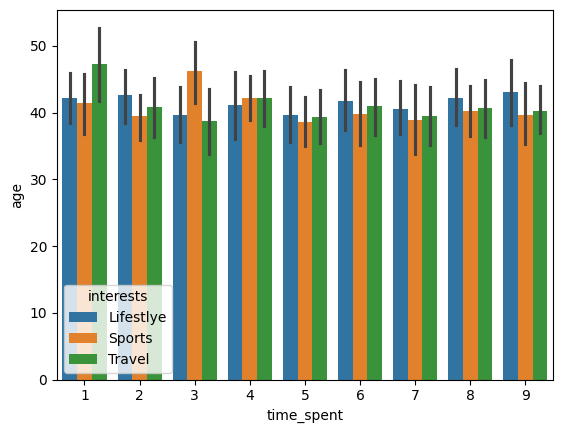

In [43]:
sns.barplot(x=df["time_spent"],y=df["age"],hue=df["interests"])

<Axes: xlabel='time_spent', ylabel='age'>

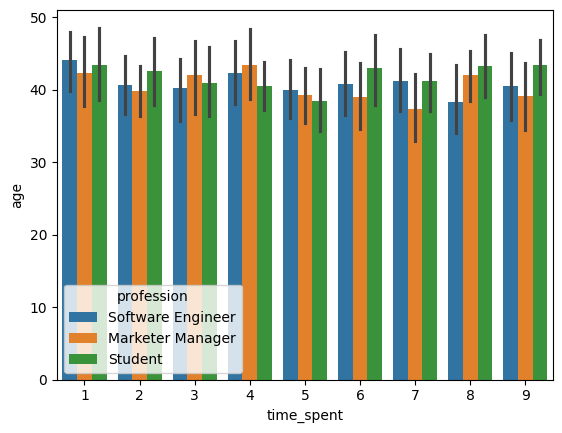

In [44]:
sns.barplot(x=df["time_spent"],y=df["age"],hue=df["profession"])

<Axes: xlabel='gender', ylabel='age'>

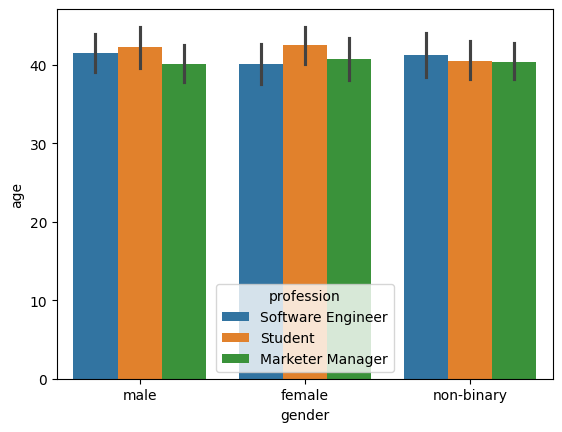

In [45]:
sns.barplot(x=df["gender"],y=df["age"],hue=df["profession"])

<Axes: xlabel='gender', ylabel='income'>

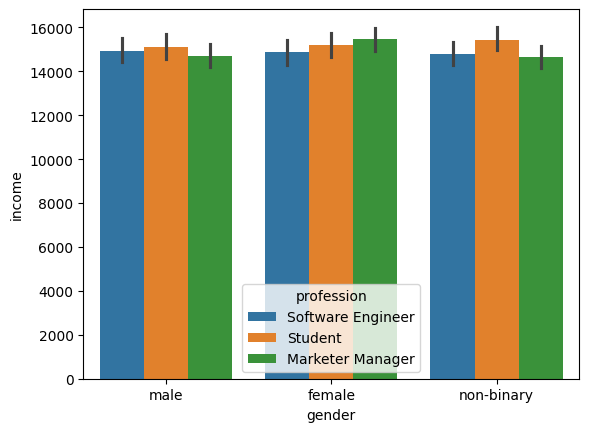

In [46]:
sns.barplot(x=df["gender"],y=df["income"],hue=df["profession"])

<Axes: xlabel='time_spent', ylabel='income'>

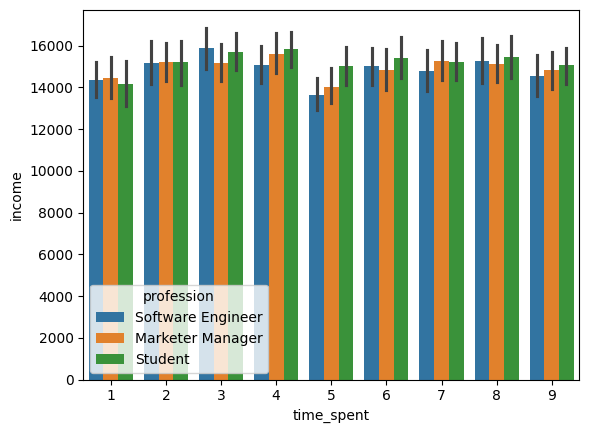

In [47]:
sns.barplot(x=df["time_spent"],y=df["income"],hue=df["profession"])

In [48]:
#Outliers Detection

<Axes: xlabel='time_spent', ylabel='age'>

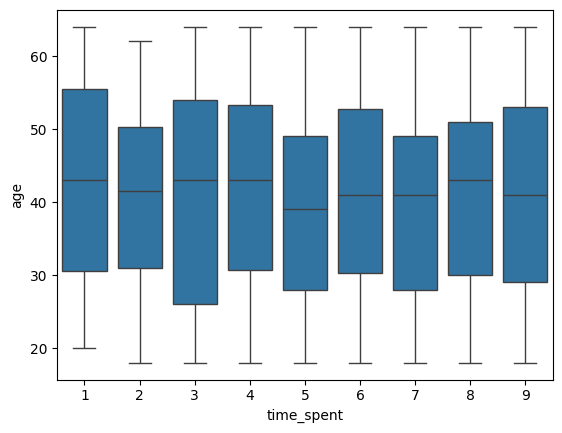

In [49]:
sns.boxplot(y=df["age"],x=df["time_spent"])

<Axes: xlabel='time_spent', ylabel='income'>

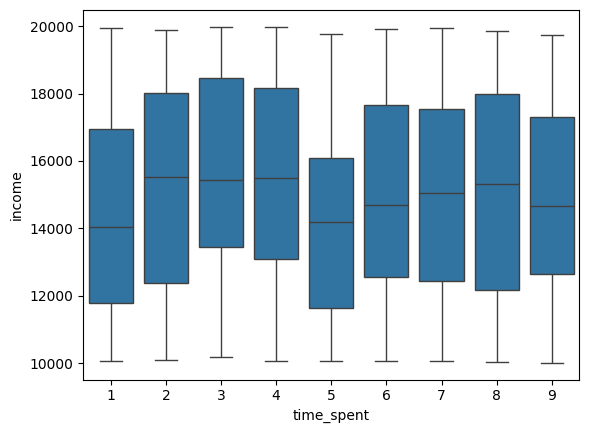

In [50]:
sns.boxplot(y=df["income"],x=df["time_spent"])

<Axes: xlabel='time_spent', ylabel='gender'>

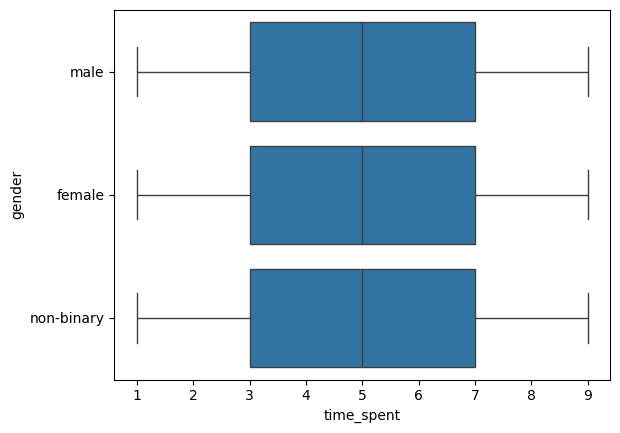

In [51]:
sns.boxplot(y=df["gender"],x=df["time_spent"])